## Data Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import random
from numpy.linalg import norm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, \
accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import statistics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Create a UDF for dataframe basic information
def complete_info(dataframe):
    
    print('Dataframe example:\n')
    print(df_na.head())
    print('\n==================================')
    print('Table Information:\n')
    print(df_na.info())
    print('\n==================================')
    print('Is there null value left?\n')
    print(df_na.isnull().any())
    print('\n==================================')
    print('Descriptive Statistics (Numeric):\n')
    print(df_na.describe(include = [np.number]).T)
    print('\n==================================')
    print('Descriptive Statistics (Categorical):\n')
    print(df_na.describe(include = [bool, object]).T)
    print('\n==================================')

In [3]:
# Import user data with new affinities in a dataframe and check its info
df_na = pd.read_csv('seed_lal_final_small.csv')
# df_add = pd.read_csv('gli_lal_additionals.csv')
# df_add_new = df_add[['opa_id', 'gender', 'character']]
# df_na = df_na.merge(df_add_new, how = 'inner', on = 'opa_id')
complete_info(df_na)

Dataframe example:

                                              opa_id  gender_M  \
0  67762726b9cc9848f49857117727c0006191d06f5b85e1920     False   
1  677627c54c02ca13d48de53b6476a7539db534bb6b11a7215     False   
2  6776227875cb663f43b42fec05d54708433d1340a28725706     False   
3  6776249ece47d7fe8b8cccb2ac982169a2986723ada7e6850     False   
4  6776299a037d18ca0a7a09912b5c84d977b000bd9eff64076     False   

   predicted_bank_bank  predicted_bank_predbank  pred_digital_digital  \
0                False                     True                  True   
1                False                    False                  True   
2                False                     True                  True   
3                False                    False                  True   
4                False                    False                  True   

   pred_digital_non_digital  loan_other_financing  ff_hidden_gems  \
0                     False                 False           False   
1     

In [4]:
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 87 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   opa_id                                     10000 non-null  object
 1   gender_M                                   10000 non-null  bool  
 2   predicted_bank_bank                        10000 non-null  bool  
 3   predicted_bank_predbank                    10000 non-null  bool  
 4   pred_digital_digital                       10000 non-null  bool  
 5   pred_digital_non_digital                   10000 non-null  bool  
 6   loan_other_financing                       10000 non-null  bool  
 7   ff_hidden_gems                             10000 non-null  bool  
 8   ff_fintech_literate                        10000 non-null  bool  
 9   ff_fintech_savvy                           10000 non-null  bool  
 10  digital_shopper                    

In [5]:
# Only want to test the new affinities. Can change if you want it to
# df_na.drop(['character', 'predicted_digital', 'predicted_bank', 'CLV'], 1, inplace = True)
# complete_info(df_na)

In [6]:
# I want to convert all the bools into object-type columns to make it uniform
bool_col = [col for col in df_na.columns if df_na[col].dtype == 'bool']
bool_col

['gender_M',
 'predicted_bank_bank',
 'predicted_bank_predbank',
 'pred_digital_digital',
 'pred_digital_non_digital',
 'loan_other_financing',
 'ff_hidden_gems',
 'ff_fintech_literate',
 'ff_fintech_savvy',
 'digital_shopper',
 'alcohol_drinker',
 'auto_geek',
 'badminton_lover',
 'basketball_lover',
 'beauty_enthusiast',
 'book_lover',
 'cinephile',
 'engaged_shopper',
 'far_sighted_shopper',
 'fashionista',
 'gadget_freak',
 'gamer',
 'gardener',
 'health_conscious',
 'home_organizer',
 'lock_safe_devotee',
 'midas_investor',
 'musician',
 'parents',
 'pet_owner',
 'recently_decorate_renovate',
 'recently_has_child',
 'recently_traveled',
 'religious',
 'sexually_active',
 'snack_sweets_lover',
 'soccer_fans',
 'sporty',
 'stationery_sorcerer',
 'tennis_lover',
 'traveler',
 'vaper',
 'visual_geek',
 'workout_warrior',
 'early_month_shopper',
 'mid_month_shopper',
 'midnight_shopper',
 'morning_shopper',
 'night_shopper',
 'noon_shopper',
 'payday_shopper',
 'weekday_shopper',
 'wee

In [7]:
# Change it into object type
df_na[bool_col] = df_na[bool_col].astype('object')
complete_info(df_na)

Dataframe example:

                                              opa_id gender_M  \
0  67762726b9cc9848f49857117727c0006191d06f5b85e1920    False   
1  677627c54c02ca13d48de53b6476a7539db534bb6b11a7215    False   
2  6776227875cb663f43b42fec05d54708433d1340a28725706    False   
3  6776249ece47d7fe8b8cccb2ac982169a2986723ada7e6850    False   
4  6776299a037d18ca0a7a09912b5c84d977b000bd9eff64076    False   

  predicted_bank_bank predicted_bank_predbank pred_digital_digital  \
0               False                    True                 True   
1               False                   False                 True   
2               False                    True                 True   
3               False                   False                 True   
4               False                   False                 True   

  pred_digital_non_digital loan_other_financing ff_hidden_gems  \
0                    False                False          False   
1                    False          

In [8]:
# Set up list of object and numeric columns for data preprocessing
obj_col = [col for col in df_na.columns if df_na[col].dtype == 'object' and col != 'opa_id']
num_col = [col for col in df_na.columns if (df_na[col].dtype == 'float64' or df_na[col].dtype == 'int64')
          and col != 'is_seed']
print('Object columns:\n', obj_col)
print('\nNumeric columns:\n', num_col)

Object columns:
 ['gender_M', 'predicted_bank_bank', 'predicted_bank_predbank', 'pred_digital_digital', 'pred_digital_non_digital', 'loan_other_financing', 'ff_hidden_gems', 'ff_fintech_literate', 'ff_fintech_savvy', 'digital_shopper', 'alcohol_drinker', 'auto_geek', 'badminton_lover', 'basketball_lover', 'beauty_enthusiast', 'book_lover', 'cinephile', 'engaged_shopper', 'far_sighted_shopper', 'fashionista', 'gadget_freak', 'gamer', 'gardener', 'health_conscious', 'home_organizer', 'lock_safe_devotee', 'midas_investor', 'musician', 'parents', 'pet_owner', 'recently_decorate_renovate', 'recently_has_child', 'recently_traveled', 'religious', 'sexually_active', 'snack_sweets_lover', 'soccer_fans', 'sporty', 'stationery_sorcerer', 'tennis_lover', 'traveler', 'vaper', 'visual_geek', 'workout_warrior', 'early_month_shopper', 'mid_month_shopper', 'midnight_shopper', 'morning_shopper', 'night_shopper', 'noon_shopper', 'payday_shopper', 'weekday_shopper', 'weekend_shopper', 'high_intensity', 'h

In [9]:
# Data preprocessing process using pipelines and column transformers
numeric_transformer = Pipeline(steps= [('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())])
                                       
categorical_transformer = Pipeline(steps= [('onehot', OneHotEncoder(drop = 'first', sparse = False))])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, num_col),
                  ('cat', categorical_transformer, obj_col)], remainder = 'passthrough')

clf = Pipeline(steps=[('preprocessor', preprocessor)])
                               
df_na_clean = clf.fit_transform(df_na)
df_na_clean[0]

/Users/alyafie/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       '67762726b9cc9848f49857117727c0006191d06f5b85e1920', 0],
      dtype=object)

In [10]:
# Check the data preprocessing result after going through pipelines and column transformers
# complete_info(df_na_clean)

In [11]:
# Generate name for the one-hot variables
cat_col = clf.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names_out(obj_col)
cat_col = list(cat_col)
print(cat_col)

['gender_M_True', 'predicted_bank_bank_True', 'predicted_bank_predbank_True', 'pred_digital_digital_True', 'pred_digital_non_digital_True', 'loan_other_financing_True', 'ff_hidden_gems_True', 'ff_fintech_literate_True', 'ff_fintech_savvy_True', 'digital_shopper_True', 'alcohol_drinker_True', 'auto_geek_True', 'beauty_enthusiast_True', 'book_lover_True', 'engaged_shopper_True', 'far_sighted_shopper_True', 'fashionista_True', 'gadget_freak_True', 'gamer_True', 'gardener_True', 'health_conscious_True', 'home_organizer_True', 'lock_safe_devotee_True', 'midas_investor_True', 'musician_True', 'parents_True', 'pet_owner_True', 'recently_decorate_renovate_True', 'recently_has_child_True', 'recently_traveled_True', 'religious_True', 'sexually_active_True', 'snack_sweets_lover_True', 'sporty_True', 'stationery_sorcerer_True', 'traveler_True', 'vaper_True', 'visual_geek_True', 'early_month_shopper_True', 'mid_month_shopper_True', 'morning_shopper_True', 'night_shopper_True', 'noon_shopper_True', 

In [12]:
# Combine all columns into one
complete_col = [num_col, cat_col]
rest = ['opa_id', 'label']
attributes = []
for i in complete_col:
    for j in i:
        attributes.append(j)

for i in rest:
    attributes.append(i)
    
print(attributes)

['gender_M_True', 'predicted_bank_bank_True', 'predicted_bank_predbank_True', 'pred_digital_digital_True', 'pred_digital_non_digital_True', 'loan_other_financing_True', 'ff_hidden_gems_True', 'ff_fintech_literate_True', 'ff_fintech_savvy_True', 'digital_shopper_True', 'alcohol_drinker_True', 'auto_geek_True', 'beauty_enthusiast_True', 'book_lover_True', 'engaged_shopper_True', 'far_sighted_shopper_True', 'fashionista_True', 'gadget_freak_True', 'gamer_True', 'gardener_True', 'health_conscious_True', 'home_organizer_True', 'lock_safe_devotee_True', 'midas_investor_True', 'musician_True', 'parents_True', 'pet_owner_True', 'recently_decorate_renovate_True', 'recently_has_child_True', 'recently_traveled_True', 'religious_True', 'sexually_active_True', 'snack_sweets_lover_True', 'sporty_True', 'stationery_sorcerer_True', 'traveler_True', 'vaper_True', 'visual_geek_True', 'early_month_shopper_True', 'mid_month_shopper_True', 'morning_shopper_True', 'night_shopper_True', 'noon_shopper_True', 

In [13]:
# Create dataframe with the one-hot variables
df_pu = pd.DataFrame(df_na_clean, columns = attributes)
df_pu

,gender_M_True,predicted_bank_bank_True,predicted_bank_predbank_True,pred_digital_digital_True,pred_digital_non_digital_True,loan_other_financing_True,ff_hidden_gems_True,ff_fintech_literate_True,ff_fintech_savvy_True,digital_shopper_True,...,predicted_smarttv_owner_True,predicted_watch_owner_True,clumpy_consumer_True,opulent_way_of_living_True,affordable_avant_garde_True,noble_guardian_True,practical_spender_True,professional_fulfillment_seeker_True,opa_id,label
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,67762726b9cc9848f49857117727c0006191d06f5b85e1920,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,677627c54c02ca13d48de53b6476a7539db534bb6b11a7215,0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6776227875cb663f43b42fec05d54708433d1340a28725706,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6776249ece47d7fe8b8cccb2ac982169a2986723ada7e6850,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6776299a037d18ca0a7a09912b5c84d977b000bd9eff64076,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6776282b1bb26d7380522af9863826d19371dcc6d21958242,1
9996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67762ef1f57c4481d2990b7352f88ded5b736070c09902131,1
9997,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67762c4d278d15d97ab03011e4046e20b1ba93c3123318458,1
9998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67762e174bb759a7436e855b86d70c3825751856e6a843629,1


In [14]:
# Descriptive stats of the feature sets
df_pu.describe()

,gender_M_True,predicted_bank_bank_True,predicted_bank_predbank_True,pred_digital_digital_True,pred_digital_non_digital_True,loan_other_financing_True,ff_hidden_gems_True,ff_fintech_literate_True,ff_fintech_savvy_True,digital_shopper_True,...,predicted_smarttv_owner_True,predicted_watch_owner_True,clumpy_consumer_True,opulent_way_of_living_True,affordable_avant_garde_True,noble_guardian_True,practical_spender_True,professional_fulfillment_seeker_True,opa_id,label
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000,10000
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10000,2
top,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67762726b9cc9848f49857117727c0006191d06f5b85e1920,0
freq,5758.0,5727.0,8006.0,8754.0,9919.0,9489.0,8167.0,9835.0,6862.0,8566.0,...,9992.0,9998.0,9454.0,9264.0,7960.0,7882.0,6832.0,7525.0,1,5000


## Information Value

In [15]:
# Create IV calculation function

from tabulate import tabulate

def calculate_iv(df_, col, target):
    # create contingency table
    data_crosstab = pd.crosstab(df_[col],
                                df_[target],
                               margins=True, margins_name="Total")

    # significance level
    alpha = 0.05

    # Calcualtion of Chisquare
    chi_square = 0
    rows = df_[col].unique()
    
    columns = df_[target].unique()
    columns = [{"1":"crossed", "0":"random"}.get(str(x), x) for x in columns]
    data_crosstab.columns = [str(x).lower() for x in data_crosstab.columns]
    data_crosstab.rename(columns={"1":"crossed", "0":"random"}, inplace=True)
    data_crosstab.index = [str(x).lower() for x in data_crosstab.index]
    data_crosstab = data_crosstab.loc[data_crosstab.total > 0]
    data_crosstab["perc_crossed"] = [x/data_crosstab.loc["total","crossed"] for x in data_crosstab.crossed]
    data_crosstab["perc_random"] = [x/data_crosstab.loc["total","random"] for x in data_crosstab.random]
    data_crosstab["woe"] = [np.log(x/y) if y != 0 else np.nan for x,y in zip(data_crosstab.perc_crossed, data_crosstab.perc_random)]
    data_crosstab["iv"] = [(x-y)*z if not np.isnan(z) else 0 for x,y,z in zip(data_crosstab.perc_crossed, data_crosstab.perc_random, data_crosstab.woe)]
    data_crosstab.loc["total", "iv"] = sum(data_crosstab.iv)
#     print(tabulate(data_crosstab, headers="keys", tablefmt='psql'))
    return data_crosstab.loc["total", "iv"]

ModuleNotFoundError: No module named 'tabulate'

In [69]:
attributes = [x for x in df_na.columns if x not in ["opa_id", "is_seed"]]
# attributes = cols_used
cat_col = attributes
iv_value = []
cat_col_iv = []
for col in cat_col:
    i = calculate_iv(df_na, col, 'is_seed')
    iv_value.append(i)
    cat_col_iv.append(col)

/var/folders/10/27vsnb7n2ss4v478b3wpdnxw0000gn/T/ipykernel_87991/3210266397.py:26: RuntimeWarning: divide by zero encountered in log
  data_crosstab["woe"] = [np.log(x/y) if y != 0 else np.nan for x,y in zip(data_crosstab.perc_crossed, data_crosstab.perc_random)]
/var/folders/10/27vsnb7n2ss4v478b3wpdnxw0000gn/T/ipykernel_87991/3210266397.py:26: RuntimeWarning: divide by zero encountered in log
  data_crosstab["woe"] = [np.log(x/y) if y != 0 else np.nan for x,y in zip(data_crosstab.perc_crossed, data_crosstab.perc_random)]
/var/folders/10/27vsnb7n2ss4v478b3wpdnxw0000gn/T/ipykernel_87991/3210266397.py:26: RuntimeWarning: divide by zero encountered in log
  data_crosstab["woe"] = [np.log(x/y) if y != 0 else np.nan for x,y in zip(data_crosstab.perc_crossed, data_crosstab.perc_random)]
/var/folders/10/27vsnb7n2ss4v478b3wpdnxw0000gn/T/ipykernel_87991/3210266397.py:26: RuntimeWarning: divide by zero encountered in log
  data_crosstab["woe"] = [np.log(x/y) if y != 0 else np.nan for x,y in zip(

In [70]:
# Create reference table of IV value for each categorical column

d = {'cat_col': cat_col_iv, 'iv_value': iv_value}
df_ref_iv = pd.DataFrame(data=d)
df_ref_iv

,cat_col,iv_value
0,gender_M,0.023449
1,predicted_bank_bank,1.880469
2,predicted_bank_predbank,0.540565
3,pred_digital_digital,1.565348
4,pred_digital_non_digital,0.069488
...,...,...
80,opulent_way_of_living,0.000338
81,affordable_avant_garde,0.003318
82,noble_guardian,1.258464
83,practical_spender,0.084932


In [71]:
extra = df_ref_iv.set_index("cat_col").to_dict("dict")["iv_value"]

In [72]:
# Create new dataframe to preserve original feature set
df_pu_iv = df_na.replace({True:1, False:0}).copy()
df_pu_iv

,opa_id,gender_M,predicted_bank_bank,predicted_bank_predbank,pred_digital_digital,pred_digital_non_digital,loan_other_financing,ff_hidden_gems,ff_fintech_literate,ff_fintech_savvy,...,predicted_smartphone_owner,predicted_smarttv_owner,predicted_watch_owner,clumpy_consumer,opulent_way_of_living,affordable_avant_garde,noble_guardian,practical_spender,professional_fulfillment_seeker,is_seed
0,67762726b9cc9848f49857117727c0006191d06f5b85e1920,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,677627c54c02ca13d48de53b6476a7539db534bb6b11a7215,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,6776227875cb663f43b42fec05d54708433d1340a28725706,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6776249ece47d7fe8b8cccb2ac982169a2986723ada7e6850,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6776299a037d18ca0a7a09912b5c84d977b000bd9eff64076,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6776282b1bb26d7380522af9863826d19371dcc6d21958242,1,0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
9996,67762ef1f57c4481d2990b7352f88ded5b736070c09902131,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
9997,67762c4d278d15d97ab03011e4046e20b1ba93c3123318458,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
9998,67762e174bb759a7436e855b86d70c3825751856e6a843629,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1


In [73]:
for i in range(len(df_ref_iv)):
    col_df = df_ref_iv['cat_col'][i]
    iv_val = df_ref_iv['iv_value'][i]
    df_pu_iv[col_df] = np.where(df_pu_iv[col_df] == 1, iv_val, 0)

df_pu_iv

,opa_id,gender_M,predicted_bank_bank,predicted_bank_predbank,pred_digital_digital,pred_digital_non_digital,loan_other_financing,ff_hidden_gems,ff_fintech_literate,ff_fintech_savvy,...,predicted_smartphone_owner,predicted_smarttv_owner,predicted_watch_owner,clumpy_consumer,opulent_way_of_living,affordable_avant_garde,noble_guardian,practical_spender,professional_fulfillment_seeker,is_seed
0,67762726b9cc9848f49857117727c0006191d06f5b85e1920,0.000000,0.000000,0.540565,1.565348,0.0,0.0,0.000000,0.0,0.000000,...,0.0007,0.0,0.0,0.0,0.0,0.000000,0.0,0.084932,0.000000,0
1,677627c54c02ca13d48de53b6476a7539db534bb6b11a7215,0.000000,0.000000,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.000000,...,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.862944,0
2,6776227875cb663f43b42fec05d54708433d1340a28725706,0.000000,0.000000,0.540565,1.565348,0.0,0.0,0.000000,0.0,0.000000,...,0.0000,0.0,0.0,0.0,0.0,0.003318,0.0,0.000000,0.000000,0
3,6776249ece47d7fe8b8cccb2ac982169a2986723ada7e6850,0.000000,0.000000,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.000000,...,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.084932,0.000000,0
4,6776299a037d18ca0a7a09912b5c84d977b000bd9eff64076,0.000000,0.000000,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.000000,...,0.0007,0.0,0.0,0.0,0.0,0.000000,0.0,0.084932,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6776282b1bb26d7380522af9863826d19371dcc6d21958242,0.023449,0.000000,0.540565,1.565348,0.0,0.0,0.271724,0.0,0.000000,...,0.0007,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.862944,1
9996,67762ef1f57c4481d2990b7352f88ded5b736070c09902131,0.000000,1.880469,0.000000,1.565348,0.0,0.0,0.000000,0.0,3.451252,...,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.862944,1
9997,67762c4d278d15d97ab03011e4046e20b1ba93c3123318458,0.023449,1.880469,0.000000,1.565348,0.0,0.0,0.000000,0.0,3.451252,...,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.862944,1
9998,67762e174bb759a7436e855b86d70c3825751856e6a843629,0.000000,1.880469,0.000000,1.565348,0.0,0.0,0.000000,0.0,3.451252,...,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.862944,1


In [74]:
# Descriptive stats for feature set with IV
df_pu_iv.describe()

,gender_M,predicted_bank_bank,predicted_bank_predbank,pred_digital_digital,pred_digital_non_digital,loan_other_financing,ff_hidden_gems,ff_fintech_literate,ff_fintech_savvy,digital_shopper,...,predicted_smartphone_owner,predicted_smarttv_owner,predicted_watch_owner,clumpy_consumer,opulent_way_of_living,affordable_avant_garde,noble_guardian,practical_spender,professional_fulfillment_seeker,is_seed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,1.000000e+04,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.009947,0.803524,0.107789,1.370306,0.000563,0.000035,0.049807,0.000247,1.083003,0.002360,...,0.000089,7.036243e-07,0.0,0.002468,0.000025,0.000677,0.266543,0.026906,0.213579,0.500000
std,0.011590,0.930289,0.215993,0.517005,0.006229,0.000153,0.105138,0.001903,1.601586,0.005768,...,0.000233,2.486817e-05,0.0,0.010270,0.000088,0.001337,0.514214,0.039515,0.372431,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.565348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.565348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.023449,1.880469,0.000000,1.565348,0.000000,0.000000,0.000000,0.000000,3.451252,0.000000,...,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.084932,0.000000,1.000000
max,0.023449,1.880469,0.540565,1.565348,0.069488,0.000694,0.271724,0.014941,3.451252,0.016455,...,0.000700,8.795303e-04,0.0,0.045200,0.000338,0.003318,1.258464,0.084932,0.862944,1.000000


In [75]:
# df_pu_iv_a = df_pu_iv[df_pu_iv['label'] == 1].sample(10000)
# df_pu_iv_b = df_pu_iv[df_pu_iv['label'] == 0].sample(10000)
# df_pu_iv_sample = pd.concat([df_pu_iv_a, df_pu_iv_b])
# df_pu_iv_sample = df_pu_iv_sample.reset_index(drop = True)
# df_pu_iv_sample

## PU Learning Steps

In [76]:
# Create new dataset for PU learning
mod_data = df_pu_iv.copy()
#get the indices of the positives samples
pos_ind = np.where(mod_data.iloc[:,-1].values == 1)[0]
#shuffle them
np.random.shuffle(pos_ind)
# leave just 75% of the positives marked
pos_sample_len = int(np.ceil(0.75 * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 3750/5000 as positives and unlabeling the rest


In [77]:
# Create new label
mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_data.iloc[:,-1].value_counts())

target variable:
 -1    6250
 1    3750
Name: class_test, dtype: int64


In [78]:
# Check the result
mod_data.head(10)

,opa_id,gender_M,predicted_bank_bank,predicted_bank_predbank,pred_digital_digital,pred_digital_non_digital,loan_other_financing,ff_hidden_gems,ff_fintech_literate,ff_fintech_savvy,...,predicted_smarttv_owner,predicted_watch_owner,clumpy_consumer,opulent_way_of_living,affordable_avant_garde,noble_guardian,practical_spender,professional_fulfillment_seeker,is_seed,class_test
0,67762726b9cc9848f49857117727c0006191d06f5b85e1920,0.000000,0.000000,0.540565,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.084932,0.000000,0,-1
1,677627c54c02ca13d48de53b6476a7539db534bb6b11a7215,0.000000,0.000000,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.862944,0,-1
2,6776227875cb663f43b42fec05d54708433d1340a28725706,0.000000,0.000000,0.540565,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.003318,0.000000,0.000000,0.000000,0,-1
3,6776249ece47d7fe8b8cccb2ac982169a2986723ada7e6850,0.000000,0.000000,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.084932,0.000000,0,-1
4,6776299a037d18ca0a7a09912b5c84d977b000bd9eff64076,0.000000,0.000000,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.084932,0.000000,0,-1
5,67762426fbe8d6a90c62cc782f7dce1a8a7c3bf5125933937,0.023449,0.000000,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,-1
6,67762b2a39dff1718b12c802d0da823aab0c0396562de9191,0.023449,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,-1
7,677620f5d36adf37ea432eb76873937a85fa23f8b48bd7680,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,-1
8,677629db0fbbab98cb0f81d9c1a5e3460a1be765573f75675,0.023449,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,-1
9,677622c78364ba7e4fe664758c3fbeb2d8044945020a64913,0.000000,1.880469,0.000000,1.565348,0.0,0.0,0.271724,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.258464,0.000000,0.862944,0,-1


In [79]:
mod_data.replace([np.inf, -np.inf], 0, inplace=True)
mod_data

,opa_id,gender_M,predicted_bank_bank,predicted_bank_predbank,pred_digital_digital,pred_digital_non_digital,loan_other_financing,ff_hidden_gems,ff_fintech_literate,ff_fintech_savvy,...,predicted_smarttv_owner,predicted_watch_owner,clumpy_consumer,opulent_way_of_living,affordable_avant_garde,noble_guardian,practical_spender,professional_fulfillment_seeker,is_seed,class_test
0,67762726b9cc9848f49857117727c0006191d06f5b85e1920,0.000000,0.000000,0.540565,1.565348,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.084932,0.000000,0,-1
1,677627c54c02ca13d48de53b6476a7539db534bb6b11a7215,0.000000,0.000000,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.862944,0,-1
2,6776227875cb663f43b42fec05d54708433d1340a28725706,0.000000,0.000000,0.540565,1.565348,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.003318,0.0,0.000000,0.000000,0,-1
3,6776249ece47d7fe8b8cccb2ac982169a2986723ada7e6850,0.000000,0.000000,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.084932,0.000000,0,-1
4,6776299a037d18ca0a7a09912b5c84d977b000bd9eff64076,0.000000,0.000000,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.084932,0.000000,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6776282b1bb26d7380522af9863826d19371dcc6d21958242,0.023449,0.000000,0.540565,1.565348,0.0,0.0,0.271724,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.862944,1,-1
9996,67762ef1f57c4481d2990b7352f88ded5b736070c09902131,0.000000,1.880469,0.000000,1.565348,0.0,0.0,0.000000,0.0,3.451252,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.862944,1,1
9997,67762c4d278d15d97ab03011e4046e20b1ba93c3123318458,0.023449,1.880469,0.000000,1.565348,0.0,0.0,0.000000,0.0,3.451252,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.862944,1,1
9998,67762e174bb759a7436e855b86d70c3825751856e6a843629,0.000000,1.880469,0.000000,1.565348,0.0,0.0,0.000000,0.0,3.451252,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.862944,1,-1


In [80]:
# Check length of the data
len(mod_data)

10000

In [81]:
# Create array for feature set, new label, and original label
x_data = mod_data.loc[:,attributes].values # just the X 
y_labeled = mod_data.loc[:,"class_test"].values # new class (just the P & U)
y_positive = mod_data.loc[:, "is_seed"].values # original class

In [82]:
# Check original label
y_positive

array([0, 0, 0, ..., 1, 1, 1])

In [83]:
# Check feature set
x_data[0]

array([0.00000000e+00, 0.00000000e+00, 5.40564998e-01, 1.56534817e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.19789903e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.63443181e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.88231215e-04,
       0.00000000e+00, 0.00000000e+00, 2.63976987e-05, 1.53959060e-02,
       6.92355817e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [84]:
# Check again the length of data whether it still has the same length
len(x_data)

10000

In [85]:
# Create a function for fitting PU estimator
def fit_PU_estimator(X,y, hold_out_ratio, estimator):
    
    # find the indices of the positive/labeled elements
    assert (type(y) == np.ndarray), "Must pass np.ndarray rather than list as y"
    positives = np.where(y == 1.)[0] 
    # hold_out_size = the *number* of positives/labeled samples 
    # that we will use later to estimate P(s=1|y=1)
    hold_out_size = int(np.ceil(len(positives) * hold_out_ratio))
    np.random.shuffle(positives)
    # hold_out = the *indices* of the positive elements 
    # that we will later use  to estimate P(s=1|y=1)
    hold_out = positives[:hold_out_size] 
    # the actual positive *elements* that we will keep aside
    X_hold_out = X[hold_out] 
    # remove the held out elements from X and y
    X = np.delete(X, hold_out,0) 
    y = np.delete(y, hold_out)
    # We fit the estimator on the unlabeled samples + (part of the) positive and labeled ones.
    # In order to estimate P(s=1|X) or  what is the probablity that an element is *labeled*
    estimator.fit(X, y)
    # We then use the estimator for prediction of the positive held-out set 
    # in order to estimate P(s=1|y=1)
    hold_out_predictions = estimator.predict_proba(X_hold_out)
    #take the probability that it is 1
    hold_out_predictions = hold_out_predictions[:,1]
    # save the mean probability 
    c = np.mean(hold_out_predictions)
    return estimator, c

def predict_PU_prob(X, estimator, prob_s1y1):
    predicted_s = estimator.predict_proba(X)
    predicted_s = predicted_s[:,1]
    return predicted_s / prob_s1y1

In [86]:
# Create a function to evaluate results
def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 

## Threshold Only

In [90]:
# Train model with different hyperparameters using custom k-cross validation
list_probs = []
learning_iterations = 5
# hyp_params = [0.6, 0.7, 0.8, 0.9, 1.]
# hyp_params = [1, 1.1, 1.2, 1.3, 1.4, 1.5]
hyp_params = [5, 7, 9, 11, 13]
predicted = np.zeros((len(hyp_params), len(x_data)))
dict_model = {}
for j in range(len(hyp_params)):
    tp_list = []
    for index in range(learning_iterations):
        pu_estimator, probs1y1 = fit_PU_estimator(x_data, y_labeled, 0.3, 
                                                  KNeighborsClassifier(metric='cosine', 
                                                                       n_neighbors=hyp_params[j], n_jobs=-1))
        predicted[j] += pu_estimator.predict_proba(x_data)[:,1]
        tp_list.append(probs1y1)
        dict_index = index+(learning_iterations*j)
        dict_model = {**dict_model, **{dict_index:pu_estimator}}
        if((index+1)%4 == 0): 
            print(f'Learning Iteration::{index+1}/{learning_iterations} => P(s=1|y=1)={round(probs1y1,4)}')
    list_probs.append(tp_list)
    print(f'Parameter Iteration::{j+1}/{len(hyp_params)}')

Learning Iteration::4/5 => P(s=1|y=1)=0.6268
Parameter Iteration::1/5
Learning Iteration::4/5 => P(s=1|y=1)=0.635
Parameter Iteration::2/5
Learning Iteration::4/5 => P(s=1|y=1)=0.6243
Parameter Iteration::3/5
Learning Iteration::4/5 => P(s=1|y=1)=0.6314
Parameter Iteration::4/5
Learning Iteration::4/5 => P(s=1|y=1)=0.6451
Parameter Iteration::5/5


In [91]:
# Create a code to find which parameters we want to use
map_list = []
for i in range(len(predicted)):
    mod_data_prob = mod_data.copy()
    mod_data_prob['similarity'] = predicted[i]/learning_iterations
    # mod_data_prob
    mod_data_prob = mod_data_prob.sort_values(by = ['similarity', 'is_seed'], ascending = [False, True])\
    .reset_index().reset_index()
    # mod_data_prob
    mod_data_prob['level_0'] = mod_data_prob['level_0'] + 1
    # mod_data_prob
    mod_data_prob = mod_data_prob.set_index(mod_data_prob['index'])
    # mod_data_prob
    mod_data_prob = mod_data_prob.drop(['index'], axis = 1)
    # mod_data_prob
    mod_data_prob = mod_data_prob.rename({'level_0':'ovr_rank'}, axis = 1)
    # mod_data_prob
    mod_data_prob['decile_rank'] = mod_data_prob['ovr_rank']/max(mod_data_prob['ovr_rank'])
    mod_data_prob['alt_ovr_rank'] = mod_data_prob['similarity'].rank(method = 'max', ascending = False)
    # mod_data_prob
    mod_data_prob_seed = mod_data_prob[mod_data_prob['is_seed'] == 1].copy()
    mod_data_prob_seed = mod_data_prob_seed.sort_values(by = ['similarity'], ascending = [False])\
    .reset_index().reset_index()
    # mod_data_prob_seed
    mod_data_prob_seed['level_0'] = mod_data_prob_seed['level_0'] + 1
    mod_data_prob_seed = mod_data_prob_seed.set_index(mod_data_prob_seed['index'])
    # mod_data_prob_seed
    mod_data_prob_seed = mod_data_prob_seed.drop(['index'], axis = 1)
    mod_data_prob_seed = mod_data_prob_seed.rename({'level_0':'seed_rank'}, axis = 1)
    mod_data_prob_seed['alt_seed_rank'] = mod_data_prob_seed['similarity'].rank(method = 'max', ascending = False)
    mod_data_prob_seed['rank_ratio'] = mod_data_prob_seed['seed_rank']/mod_data_prob_seed['ovr_rank']
    mod_data_prob_seed['alt_rank_ratio'] = mod_data_prob_seed['alt_seed_rank']/mod_data_prob_seed['alt_ovr_rank']
    # mod_data_prob_seed
    result = mod_data_prob_seed['alt_rank_ratio'].mean()
    print(f"MAP from hyperparameter {hyp_params[i]} is {result:.5f}")
    # mod_data_prob_seed[mod_data_prob_seed['ovr_rank'] <= 500]['alt_rank_ratio'].mean()
    map_list.append(result)

MAP from hyperparameter 5 is 0.92157
MAP from hyperparameter 7 is 0.92538
MAP from hyperparameter 9 is 0.80972
MAP from hyperparameter 11 is 0.93559
MAP from hyperparameter 13 is 0.88055


In [92]:
mod_data_prob_seed

,seed_rank,ovr_rank,opa_id,gender_M,predicted_bank_bank,predicted_bank_predbank,pred_digital_digital,pred_digital_non_digital,loan_other_financing,ff_hidden_gems,...,practical_spender,professional_fulfillment_seeker,is_seed,class_test,similarity,decile_rank,alt_ovr_rank,alt_seed_rank,rank_ratio,alt_rank_ratio
index,,,,,,,,,,,,,,,,,,,,,
6369,1,1,67762f43c6d836135c4c9b968f477bb99d5936843a6860149,0.000000,1.880469,0.000000,1.565348,0.0,0.0,0.000000,...,0.000000,0.000000,1,1,0.938462,0.0001,3.0,3.0,1.000000,1.0
8423,2,3,67762f49d5ceaa0298dfd4bebfc06ccc036b906bc4d8c4511,0.000000,1.880469,0.000000,1.565348,0.0,0.0,0.000000,...,0.000000,0.862944,1,1,0.938462,0.0003,3.0,3.0,0.666667,1.0
6743,3,2,67762ffb5801f8b6d846ed8af83528f2c3cf6806c4d4d8665,0.023449,1.880469,0.000000,1.565348,0.0,0.0,0.000000,...,0.000000,0.862944,1,1,0.938462,0.0002,3.0,3.0,1.500000,1.0
8910,4,38,677629fbbfd029c2693817cf28c7050609a5c848926727000,0.023449,1.880469,0.000000,1.565348,0.0,0.0,0.000000,...,0.000000,0.862944,1,1,0.923077,0.0038,48.0,48.0,0.105263,1.0
8176,5,29,677624021469dc99b1185ca77b589fc971a6869ce5cdf0314,0.000000,1.880469,0.000000,1.565348,0.0,0.0,0.000000,...,0.000000,0.862944,1,-1,0.923077,0.0029,48.0,48.0,0.172414,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9203,4996,9996,677621a61712836a5db7cb75a03629e5189dec0e3d9071269,0.000000,0.000000,0.540565,1.565348,0.0,0.0,0.271724,...,0.000000,0.862944,1,-1,0.000000,0.9996,10000.0,5000.0,0.499800,0.5
9214,4997,9997,67762a9cc5c4b0d206fb8f6e67684e63a0509db89a0bd5372,0.023449,1.880469,0.000000,1.565348,0.0,0.0,0.000000,...,0.084932,0.000000,1,-1,0.000000,0.9997,10000.0,5000.0,0.499850,0.5
9342,4998,9998,67762a880dab3b8813339b395395aa4b9895827d79acb4218,0.023449,0.000000,0.000000,1.565348,0.0,0.0,0.000000,...,0.000000,0.000000,1,-1,0.000000,0.9998,10000.0,5000.0,0.499900,0.5


In [94]:
# Create a code to find which parameters we want to use
map_list = []
for i in range(len(predicted)):
    mod_data_prob = mod_data.copy()
    mod_data_prob['similarity'] = predicted[i]/learning_iterations
    # mod_data_prob
    mod_data_prob = mod_data_prob.sort_values(by = ['similarity', 'is_seed'], ascending = [False, True])\
    .reset_index().reset_index()
    # mod_data_prob
    mod_data_prob['level_0'] = mod_data_prob['level_0'] + 1
    # mod_data_prob
    mod_data_prob = mod_data_prob.set_index(mod_data_prob['index'])
    # mod_data_prob
    mod_data_prob = mod_data_prob.drop(['index'], axis = 1)
    # mod_data_prob
    mod_data_prob = mod_data_prob.rename({'level_0':'ovr_rank'}, axis = 1)
    # mod_data_prob
    mod_data_prob['decile_rank'] = mod_data_prob['ovr_rank']/max(mod_data_prob['ovr_rank'])
    mod_data_prob['alt_ovr_rank'] = mod_data_prob['similarity'].rank(method = 'max', ascending = False)
    # mod_data_prob
    mod_data_prob_seed = mod_data_prob[mod_data_prob['is_seed'] == 1].copy()
    mod_data_prob_seed = mod_data_prob_seed.sort_values(by = ['similarity'], ascending = [False])\
    .reset_index().reset_index()
    # mod_data_prob_seed
    mod_data_prob_seed['level_0'] = mod_data_prob_seed['level_0'] + 1
    mod_data_prob_seed = mod_data_prob_seed.set_index(mod_data_prob_seed['index'])
    # mod_data_prob_seed
    mod_data_prob_seed = mod_data_prob_seed.drop(['index'], axis = 1)
    mod_data_prob_seed = mod_data_prob_seed.rename({'level_0':'seed_rank'}, axis = 1)
    mod_data_prob_seed['alt_seed_rank'] = mod_data_prob_seed['similarity'].rank(method = 'max', ascending = False)
    mod_data_prob_seed['rank_ratio'] = mod_data_prob_seed['seed_rank']/mod_data_prob_seed['ovr_rank']
    mod_data_prob_seed['alt_rank_ratio'] = mod_data_prob_seed['alt_seed_rank']/mod_data_prob_seed['alt_ovr_rank']
    # mod_data_prob_seed
    result = mod_data_prob_seed[(mod_data_prob_seed['is_seed'] == 1) &\
                                (mod_data_prob_seed['class_test'] == -1)]['alt_rank_ratio'].mean()
    print(f"MAP from hyperparameter {hyp_params[i]} is {result:.5f}")
    # mod_data_prob_seed[mod_data_prob_seed['ovr_rank'] <= 500]['alt_rank_ratio'].mean()
    map_list.append(result)

MAP from hyperparameter 5 is 0.89703
MAP from hyperparameter 7 is 0.90662
MAP from hyperparameter 9 is 0.83389
MAP from hyperparameter 11 is 0.91918
MAP from hyperparameter 13 is 0.86936


In [95]:
len(predicted)

5

In [96]:
# Find best hyperparameters using Lift ratio (scrapped)
# for i in range(len(predicted)):
#     y_probs = predicted[i]
#     df_lift = pd.DataFrame()
#     df_lift['similarity'] = y_probs
#     df_lift['label'] = y_positive
# #     df_lift['decile_rank'] = pd.qcut(df_lift['similarity'], 10, labels = False)
#     df_lift['decile_rank'] = df_lift.similarity.apply(create_bin)
#     df_lift_grouped = df_lift.groupby("decile_rank").agg({"label":['count', sum]})
#     df_lift_grouped = df_lift_grouped.iloc[::-1]
#     df_lift_grouped.columns = ['count_', 'sum_']
#     total = sum(df_lift_grouped.count_)
#     total_crossed = sum(df_lift_grouped.sum_)
#     df_lift_grouped['perc_cum'] = df_lift_grouped.count_ / total
#     df_lift_grouped['crossed_rate'] = df_lift_grouped.sum_ / df_lift_grouped.count_
#     df_lift_grouped['cum_count'] = df_lift_grouped.count_.cumsum()
#     df_lift_grouped['perc_cum_count'] = df_lift_grouped.cum_count / total
#     df_lift_grouped['perc_event'] = df_lift_grouped.sum_ / total_crossed
#     df_lift_grouped['gain'] = df_lift_grouped.perc_event.cumsum()
#     df_lift_grouped['cum_lift'] = df_lift_grouped.gain / df_lift_grouped.perc_cum_count
#     print(f"max lift from hyperparameter {i} is {df_lift_grouped.cum_lift.max():.2f}")

In [136]:
best_params = np.array(map_list).argmax()
avg_probs1y1 = np.mean(list_probs[best_params])
y_predict = [1 if x > 0.6 else 0 for x in ((predicted[best_params]/learning_iterations))]
# y_positive = list(y_positive.astype('int'))
y_predict

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [137]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_positive, y_predict).ravel()
(tn, fp, fn, tp)

(4522, 478, 1578, 3422)

In [138]:
# Check the classification result
evaluate_results(y_positive, y_predict)

Classification results:
f1: 76.90%
roc: 79.44%
recall: 68.44%
precision: 87.74%


In [100]:
index_dict_model = ((np.array(map_list).argmax()+1)*learning_iterations)-1
dict_model[index_dict_model]

KNeighborsClassifier(metric='cosine', n_jobs=-1, n_neighbors=11)

In [101]:
avg_probs1y1

0.6348929292929293

In [102]:
mod_data_prob

,ovr_rank,opa_id,gender_M,predicted_bank_bank,predicted_bank_predbank,pred_digital_digital,pred_digital_non_digital,loan_other_financing,ff_hidden_gems,ff_fintech_literate,...,opulent_way_of_living,affordable_avant_garde,noble_guardian,practical_spender,professional_fulfillment_seeker,is_seed,class_test,similarity,decile_rank,alt_ovr_rank
index,,,,,,,,,,,,,,,,,,,,,
6369,1,67762f43c6d836135c4c9b968f477bb99d5936843a6860149,0.000000,1.880469,0.000000,1.565348,0.0,0.0,0.000000,0.0,...,0.0,0.000000,1.258464,0.000000,0.000000,1,1,0.938462,0.0001,3.0
6743,2,67762ffb5801f8b6d846ed8af83528f2c3cf6806c4d4d8665,0.023449,1.880469,0.000000,1.565348,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.862944,1,1,0.938462,0.0002,3.0
8423,3,67762f49d5ceaa0298dfd4bebfc06ccc036b906bc4d8c4511,0.000000,1.880469,0.000000,1.565348,0.0,0.0,0.000000,0.0,...,0.0,0.000000,1.258464,0.000000,0.862944,1,1,0.938462,0.0003,3.0
5032,4,67762052513bd1a1b8ad97d7e91982f8c3ddf83c9972c4421,0.023449,1.880469,0.000000,1.565348,0.0,0.0,0.000000,0.0,...,0.0,0.000000,1.258464,0.000000,0.862944,1,1,0.923077,0.0004,48.0
5118,5,677629de2d290bbed2e2a1e78e0d09c9aff4483f1cf4b8644,0.023449,1.880469,0.000000,1.565348,0.0,0.0,0.000000,0.0,...,0.0,0.000000,1.258464,0.000000,0.000000,1,1,0.923077,0.0005,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9203,9996,677621a61712836a5db7cb75a03629e5189dec0e3d9071269,0.000000,0.000000,0.540565,1.565348,0.0,0.0,0.271724,0.0,...,0.0,0.000000,0.000000,0.000000,0.862944,1,-1,0.000000,0.9996,10000.0
9214,9997,67762a9cc5c4b0d206fb8f6e67684e63a0509db89a0bd5372,0.023449,1.880469,0.000000,1.565348,0.0,0.0,0.000000,0.0,...,0.0,0.003318,0.000000,0.084932,0.000000,1,-1,0.000000,0.9997,10000.0
9342,9998,67762a880dab3b8813339b395395aa4b9895827d79acb4218,0.023449,0.000000,0.000000,1.565348,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,1,-1,0.000000,0.9998,10000.0


In [103]:
# mod_data_prob_seed.to_csv

<AxesSubplot: xlabel='similarity', ylabel='Density'>

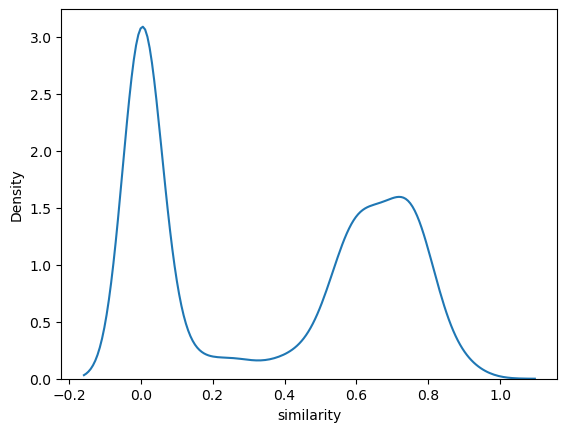

In [104]:
sns.kdeplot(data=mod_data_prob, x="similarity")

<AxesSubplot: xlabel='similarity', ylabel='Density'>

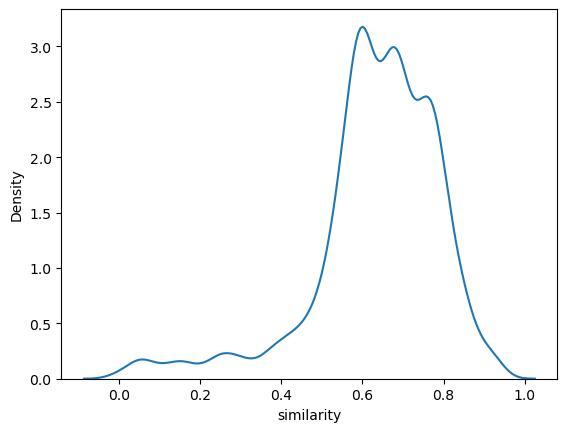

In [107]:
sns.kdeplot(data=mod_data_prob[mod_data_prob['is_seed'] == 1], x="similarity")

<AxesSubplot: xlabel='similarity', ylabel='Density'>

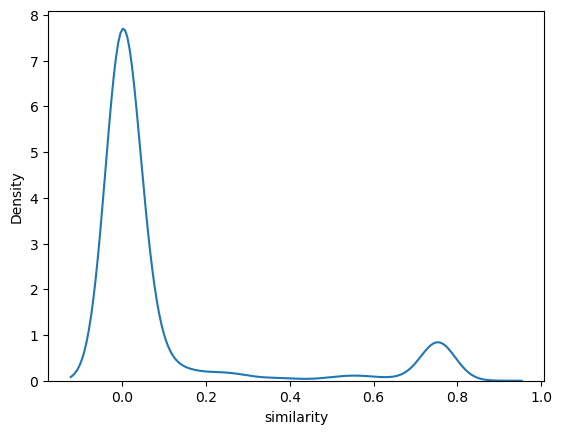

In [108]:
sns.kdeplot(data=mod_data_prob[mod_data_prob['is_seed'] == 0], x="similarity")

<AxesSubplot: xlabel='similarity', ylabel='Density'>

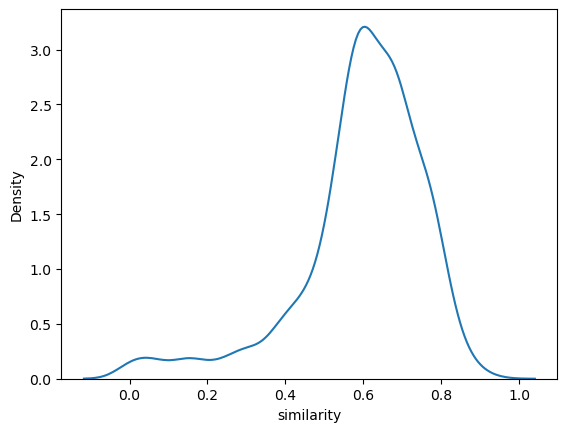

In [109]:
sns.kdeplot(data=mod_data_prob[(mod_data_prob['class_test'] == -1) & (mod_data_prob['is_seed'] == 1)], x="similarity")

In [110]:
df_pop = pd.read_csv('pop_sample_bas.csv')
df_pop

,opa_id,gender_M,predicted_bank_bank,predicted_bank_predbank,pred_digital_digital,pred_digital_non_digital,loan_other_financing,ff_hidden_gems,ff_fintech_literate,ff_fintech_savvy,...,predicted_reseller,predicted_smartphone_owner,predicted_smarttv_owner,predicted_watch_owner,clumpy_consumer,opulent_way_of_living,affordable_avant_garde,noble_guardian,practical_spender,professional_fulfillment_seeker
0,677621c9806bf7b5bbe556ed52a49965255aceff31a000992,False,False,True,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,67762499cfc3fe1b3ac45c116f5225e34889a6bfe19aa9553,False,False,True,True,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
2,67762e6a09161ebdbcb002d4f5aefb05b54da08caf7504436,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,67762d37b0e8fc5381cfc6dc1c93cac598298c66d16994926,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,67762524fac812a92ba8bc9b34d6828230c354c3b69d72829,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,677623a7b8f2107629567ad7203611f487ec8ba4d4bf97376,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
49996,67762c1023e41da57df7b5885978d7abc7ed72146674e1170,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
49997,67762b356285b5ed0231369a455924a13ec2e6357cf551150,False,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
49998,677629b10c2913cd1c66cfc25032f8a44eb441fe127439207,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [111]:
df_pu_iv_pop = df_pop.replace({True:1, False:0}).copy()

In [112]:
df_pu_iv_pop

,opa_id,gender_M,predicted_bank_bank,predicted_bank_predbank,pred_digital_digital,pred_digital_non_digital,loan_other_financing,ff_hidden_gems,ff_fintech_literate,ff_fintech_savvy,...,predicted_reseller,predicted_smartphone_owner,predicted_smarttv_owner,predicted_watch_owner,clumpy_consumer,opulent_way_of_living,affordable_avant_garde,noble_guardian,practical_spender,professional_fulfillment_seeker
0,677621c9806bf7b5bbe556ed52a49965255aceff31a000992,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,67762499cfc3fe1b3ac45c116f5225e34889a6bfe19aa9553,0,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,67762e6a09161ebdbcb002d4f5aefb05b54da08caf7504436,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,67762d37b0e8fc5381cfc6dc1c93cac598298c66d16994926,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,67762524fac812a92ba8bc9b34d6828230c354c3b69d72829,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,677623a7b8f2107629567ad7203611f487ec8ba4d4bf97376,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49996,67762c1023e41da57df7b5885978d7abc7ed72146674e1170,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49997,67762b356285b5ed0231369a455924a13ec2e6357cf551150,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
49998,677629b10c2913cd1c66cfc25032f8a44eb441fe127439207,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
for i in range(len(df_ref_iv)):
    col_df = df_ref_iv['cat_col'][i]
    iv_val = df_ref_iv['iv_value'][i]
    df_pu_iv_pop[col_df] = np.where(df_pu_iv_pop[col_df] == 1, iv_val, 0)

df_pu_iv_pop

,opa_id,gender_M,predicted_bank_bank,predicted_bank_predbank,pred_digital_digital,pred_digital_non_digital,loan_other_financing,ff_hidden_gems,ff_fintech_literate,ff_fintech_savvy,...,predicted_reseller,predicted_smartphone_owner,predicted_smarttv_owner,predicted_watch_owner,clumpy_consumer,opulent_way_of_living,affordable_avant_garde,noble_guardian,practical_spender,professional_fulfillment_seeker
0,677621c9806bf7b5bbe556ed52a49965255aceff31a000992,0.000000,0.0,0.540565,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.007416,0.0000,0.0,0.0,0.0000,0.000338,0.000000,0.0,0.000000,0.000000
1,67762499cfc3fe1b3ac45c116f5225e34889a6bfe19aa9553,0.000000,0.0,0.540565,1.565348,0.0,0.0,0.271724,0.0,0.0,...,0.000000,0.0007,0.0,0.0,0.0000,0.000000,0.003318,0.0,0.000000,0.000000
2,67762e6a09161ebdbcb002d4f5aefb05b54da08caf7504436,0.000000,0.0,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.000000
3,67762d37b0e8fc5381cfc6dc1c93cac598298c66d16994926,0.000000,0.0,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0000,0.0,0.0,0.0452,0.000000,0.000000,0.0,0.084932,0.000000
4,67762524fac812a92ba8bc9b34d6828230c354c3b69d72829,0.000000,0.0,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0007,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.084932,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,677623a7b8f2107629567ad7203611f487ec8ba4d4bf97376,0.000000,0.0,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.084932,0.000000
49996,67762c1023e41da57df7b5885978d7abc7ed72146674e1170,0.000000,0.0,0.540565,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.862944
49997,67762b356285b5ed0231369a455924a13ec2e6357cf551150,0.000000,0.0,0.540565,1.565348,0.0,0.0,0.271724,0.0,0.0,...,0.000000,0.0000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.084932,0.000000
49998,677629b10c2913cd1c66cfc25032f8a44eb441fe127439207,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.000000


In [116]:
df_pu_iv_pop.replace([np.inf, -np.inf], 0, inplace=True)
df_pu_iv_pop

,opa_id,gender_M,predicted_bank_bank,predicted_bank_predbank,pred_digital_digital,pred_digital_non_digital,loan_other_financing,ff_hidden_gems,ff_fintech_literate,ff_fintech_savvy,...,predicted_reseller,predicted_smartphone_owner,predicted_smarttv_owner,predicted_watch_owner,clumpy_consumer,opulent_way_of_living,affordable_avant_garde,noble_guardian,practical_spender,professional_fulfillment_seeker
0,677621c9806bf7b5bbe556ed52a49965255aceff31a000992,0.000000,0.0,0.540565,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.007416,0.0000,0.0,0.0,0.0000,0.000338,0.000000,0.0,0.000000,0.000000
1,67762499cfc3fe1b3ac45c116f5225e34889a6bfe19aa9553,0.000000,0.0,0.540565,1.565348,0.0,0.0,0.271724,0.0,0.0,...,0.000000,0.0007,0.0,0.0,0.0000,0.000000,0.003318,0.0,0.000000,0.000000
2,67762e6a09161ebdbcb002d4f5aefb05b54da08caf7504436,0.000000,0.0,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.000000
3,67762d37b0e8fc5381cfc6dc1c93cac598298c66d16994926,0.000000,0.0,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0000,0.0,0.0,0.0452,0.000000,0.000000,0.0,0.084932,0.000000
4,67762524fac812a92ba8bc9b34d6828230c354c3b69d72829,0.000000,0.0,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0007,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.084932,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,677623a7b8f2107629567ad7203611f487ec8ba4d4bf97376,0.000000,0.0,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.084932,0.000000
49996,67762c1023e41da57df7b5885978d7abc7ed72146674e1170,0.000000,0.0,0.540565,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.862944
49997,67762b356285b5ed0231369a455924a13ec2e6357cf551150,0.000000,0.0,0.540565,1.565348,0.0,0.0,0.271724,0.0,0.0,...,0.000000,0.0000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.084932,0.000000
49998,677629b10c2913cd1c66cfc25032f8a44eb441fe127439207,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.000000


In [117]:
x_pop = df_pu_iv_pop.loc[:,attributes].values # just the X 
len(x_pop)

50000

In [118]:
pop_probs = dict_model[index_dict_model].predict_proba(x_pop)[:,1]

In [119]:
df_pu_iv_pop['similarity'] = pop_probs
df_pu_iv_pop

,opa_id,gender_M,predicted_bank_bank,predicted_bank_predbank,pred_digital_digital,pred_digital_non_digital,loan_other_financing,ff_hidden_gems,ff_fintech_literate,ff_fintech_savvy,...,predicted_smartphone_owner,predicted_smarttv_owner,predicted_watch_owner,clumpy_consumer,opulent_way_of_living,affordable_avant_garde,noble_guardian,practical_spender,professional_fulfillment_seeker,similarity
0,677621c9806bf7b5bbe556ed52a49965255aceff31a000992,0.000000,0.0,0.540565,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.000338,0.000000,0.0,0.000000,0.000000,0.000000
1,67762499cfc3fe1b3ac45c116f5225e34889a6bfe19aa9553,0.000000,0.0,0.540565,1.565348,0.0,0.0,0.271724,0.0,0.0,...,0.0007,0.0,0.0,0.0000,0.000000,0.003318,0.0,0.000000,0.000000,0.000000
2,67762e6a09161ebdbcb002d4f5aefb05b54da08caf7504436,0.000000,0.0,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,67762d37b0e8fc5381cfc6dc1c93cac598298c66d16994926,0.000000,0.0,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.0000,0.0,0.0,0.0452,0.000000,0.000000,0.0,0.084932,0.000000,0.000000
4,67762524fac812a92ba8bc9b34d6828230c354c3b69d72829,0.000000,0.0,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.0007,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.084932,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,677623a7b8f2107629567ad7203611f487ec8ba4d4bf97376,0.000000,0.0,0.000000,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.084932,0.000000,0.000000
49996,67762c1023e41da57df7b5885978d7abc7ed72146674e1170,0.000000,0.0,0.540565,1.565348,0.0,0.0,0.000000,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.862944,0.000000
49997,67762b356285b5ed0231369a455924a13ec2e6357cf551150,0.000000,0.0,0.540565,1.565348,0.0,0.0,0.271724,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.084932,0.000000,0.363636
49998,677629b10c2913cd1c66cfc25032f8a44eb441fe127439207,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.727273


<AxesSubplot: xlabel='similarity', ylabel='Density'>

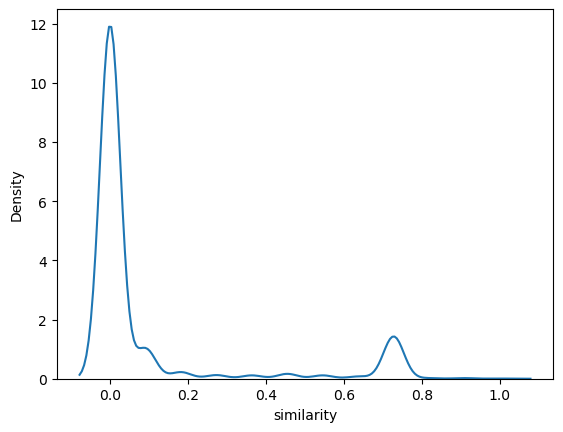

In [120]:
sns.kdeplot(data=df_pu_iv_pop, x="similarity")

In [125]:
df_pu_iv_pop[['opa_id', 'similarity']].to_csv('virgo_alfagift.csv', index=False)

In [124]:
avg_probs1y1

0.6348929292929293

In [128]:
mod_data_prob[['opa_id', 'similarity']].to_csv('virgo_training_alfagift.csv', index = False)